Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid
warnings.filterwarnings('ignore')

Read in data

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Select the values of features 'ApplicationIncome' and 'LoanAmount'

In [3]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
X_train = data.values

Transform the data into standard normally distributed data so as to improve the estimator performance

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

# K-Means

In [5]:
kmeans_model = KMeans(n_clusters=5, random_state=0, n_init="auto")
clusters_kmeans = kmeans_model.fit_predict(X)

# Bisecting K-Means

In [6]:
# Define the number of clusters to be found
k = 5

# Define the number of iterations to be performed
num_of_iterations = 10

# Initialize the list of clusters to contain the cluster containing all points
clusters = [X]

In [7]:
# Repeat until the list of clusters contains K clusters
while len(clusters) < k:

    # If there are no clusters left to bisect, break
    if len(clusters) < 1:
        break
    
    # Select a cluster from the list of clusters
    cluster = clusters.pop(0)
    
    sse = float('inf')
    best_clusters = None
    
    # For i = 1 to num_of_iterations do
    for i in range(num_of_iterations):
        
        # Bisect the selected cluster using basic K-means
        kmeans = KMeans(n_clusters=2).fit(cluster)
        labels = kmeans.labels_
        
        # Split the cluster into two clusters based on the labels
        cluster1 = cluster[labels == 0]
        cluster2 = cluster[labels == 1]
        
        # Calculate the SSE of the two new clusters
        sse1 = np.sum(np.square(cluster1 - kmeans.cluster_centers_[0]))
        sse2 = np.sum(np.square(cluster2 - kmeans.cluster_centers_[1]))
        total_sse = sse1 + sse2
        
        # If the total SSE is smaller than the current best, update the best
        if total_sse < sse:
            sse = total_sse
            best_clusters = [cluster1, cluster2]
    
    # Add the two clusters from the bisection to the list of clusters
    clusters += best_clusters

In [8]:
# Concatenate the arrays in clusters into a single array
cluster_labels = np.zeros(X.shape[0], dtype=int)
for i, cluster in enumerate(clusters):
    cluster_labels[np.isin(X, cluster).all(axis=1)] = i

# Compare Scatter Plots

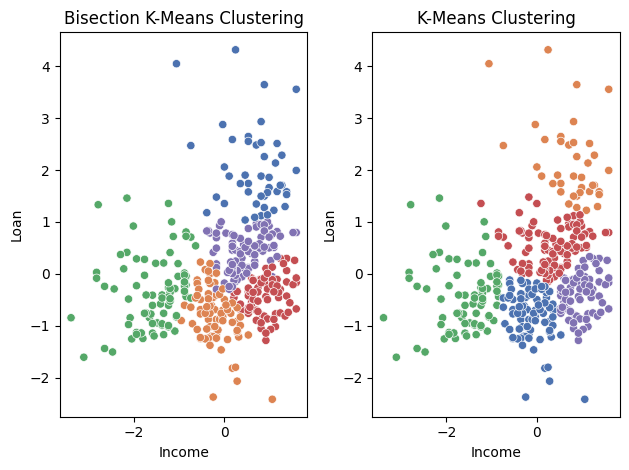

In [9]:
# Bisecting K-Means Clustering Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:,1],
                y=X[:,0],
                hue=cluster_labels,
                palette="deep",
                legend=None)
plt.xlabel('Income')
plt.ylabel('Loan')
plt.title('Bisection K-Means Clustering')

# K-Means Clustering Scatter Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:,1],
                y=X[:,0],
                hue=clusters_kmeans,
                palette="deep",
                legend = None
                )
plt.xlabel('Income')
plt.ylabel('Loan')
plt.title("K-Means Clustering")

# Show the plots
plt.tight_layout()
plt.show()

